## 간단하게

In [1]:
import pandas as pd

df_train = pd.read_csv('../data/mnist_train.csv')
df_test = pd.read_csv('../data/mnist_test.csv')

df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [2]:
import numpy as np

X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test['label'])

In [3]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [4]:
img = X_train[0]
label = y_train[0]

img = img.reshape(28,28)
img_show(img)

Opening in existing browser session.


In [5]:
import pickle

def init_network():
    with open("../data/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    return np.exp(a) / np.sum(np.exp(a))

In [7]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = sigmoid(a3)

    return y

In [8]:
network = init_network()
accuracy_cnt = 0

for i in range(len(X_train)):
    y_pred = predict(network, X_train[i])
    p = np.argmax(y_pred)
    if p == y_train[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(X_train)))

/tmp/ipykernel_43043/3628008813.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy:0.9251833333333334


In [12]:
batch_size = 50
accuracy_cnt = 0

for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i:i+batch_size]
    y_batch = predict(network, X_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == y_train[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(X_train)))

/tmp/ipykernel_43043/3628008813.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy:0.9251833333333334


## 제대로 다시

In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/home/kth/anaconda3/envs/dl_venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1747364591.562485   56026 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747364591.593757   56026 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747364591.594083   56026 cuda_executor.cc:1015] successful NUMA node r

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                 epochs=10, batch_size=100, verbose=1)
print('Fit time : ', time.time() - start_time)

Epoch 1/10


2025-05-16 12:05:00.587313: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2025-05-16 12:05:00.682206: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
I0000 00:00:1747364701.289338   57356 service.cc:146] XLA service 0x79c1400085d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747364701.289378   57356 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-05-16 12:05:01.302716: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-16 12:05:01.351351: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


194/600 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.8273 - loss: 0.6051

I0000 00:00:1747364701.896015   57356 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


587/600 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.8896 - loss: 0.3870

2025-05-16 12:05:02.424866: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.
2025-05-16 12:05:02.446281: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8906 - loss: 0.3835 - val_accuracy: 0.9669 - val_loss: 0.1093
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.9731 - loss: 0.0897 - val_accuracy: 0.9749 - val_loss: 0.0829
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.9836 - loss: 0.0537 - val_accuracy: 0.9788 - val_loss: 0.0657
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9888 - loss: 0.0363 - val_accuracy: 0.9789 - val_loss: 0.0702
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.9933 - loss: 0.0247 - val_accuracy: 0.9814 - val_loss: 0.0603
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.9954 - loss: 0.0164 - val_accuracy: 0.9805 - val_loss: 0.0627
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 0.9967 - loss: 0.0121 - val_accuracy: 0.9805 - val_loss: 0.0609
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9970 - loss: 0.0108 - val_accuracy: 0.9

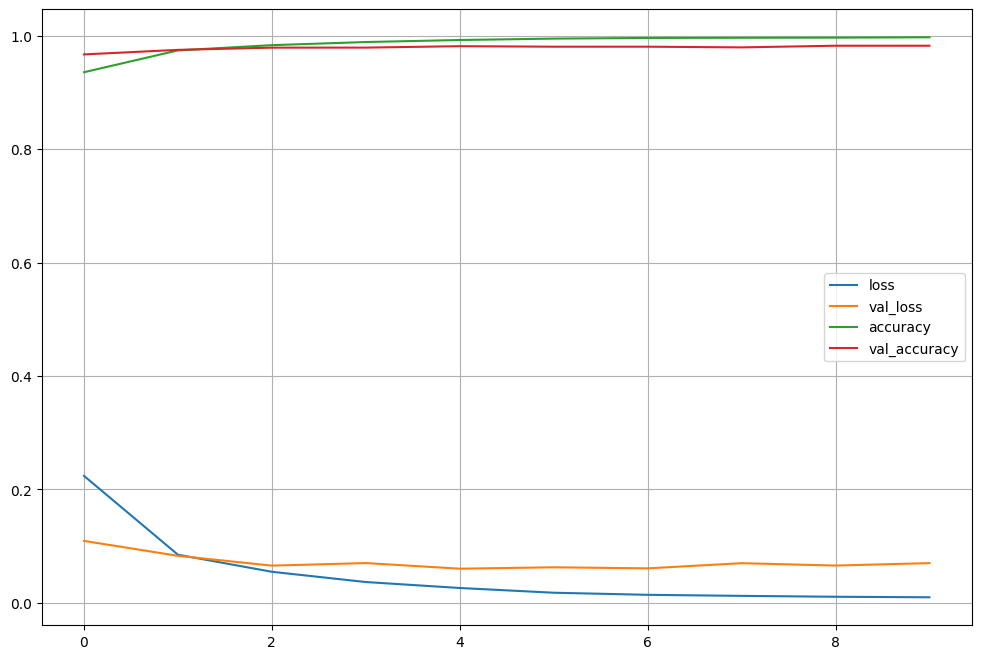

In [7]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [8]:
score = model.evaluate(x_test, y_test)
print(score[0])
print(score[1])

2025-05-16 12:08:26.093512: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9791 - loss: 0.0850
0.07011014223098755
0.982200026512146


In [9]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [10]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [11]:
wrong_results = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_results.append(n)

len(wrong_results)

178

In [12]:
import random

samples = random.choices(population=wrong_results, k=16)
samples

[3838,
 1813,
 9729,
 1393,
 6662,
 5955,
 4065,
 3943,
 6574,
 6571,
 4201,
 9071,
 4751,
 3533,
 5331,
 2118]

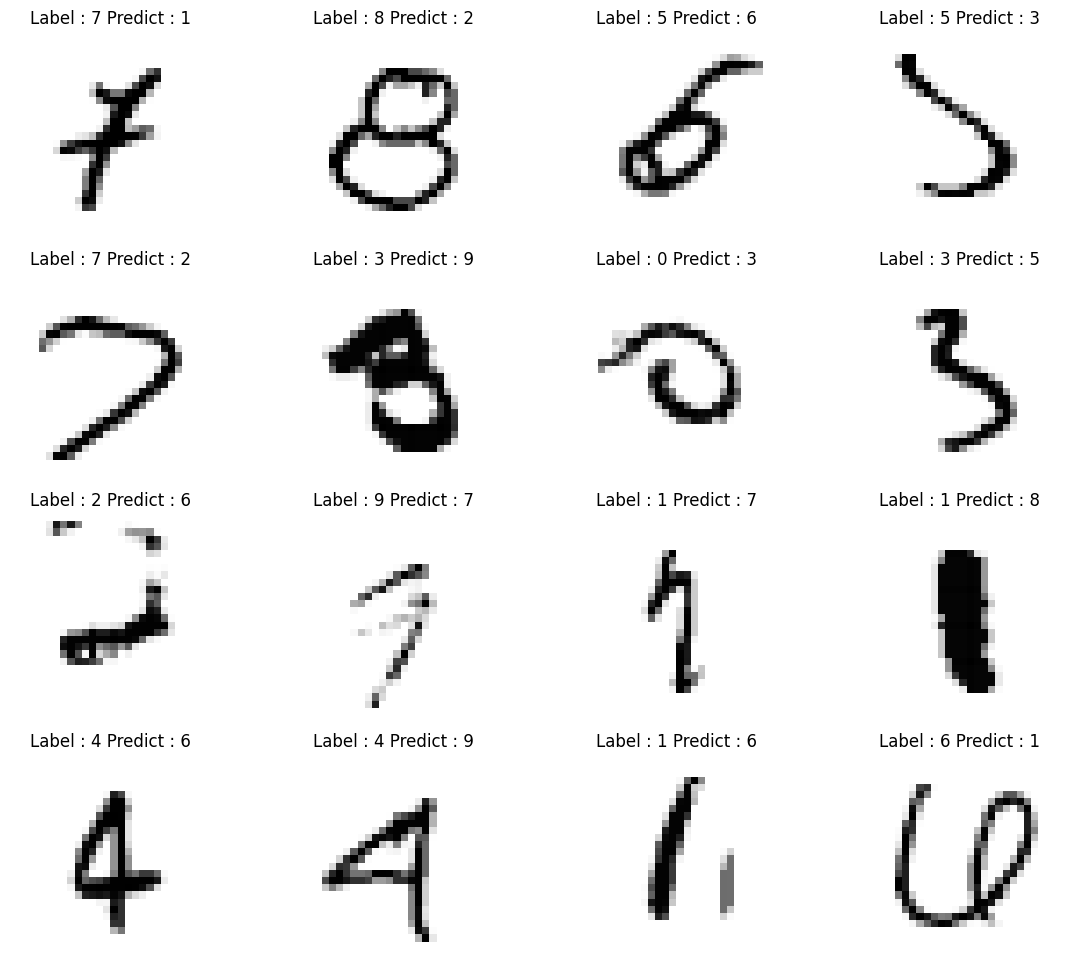

In [14]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

## Fashion MNIST

In [15]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
import random
import matplotlib.pyplot as plt

samples = random.choices(population=range(0, len(y_train)), k=16)

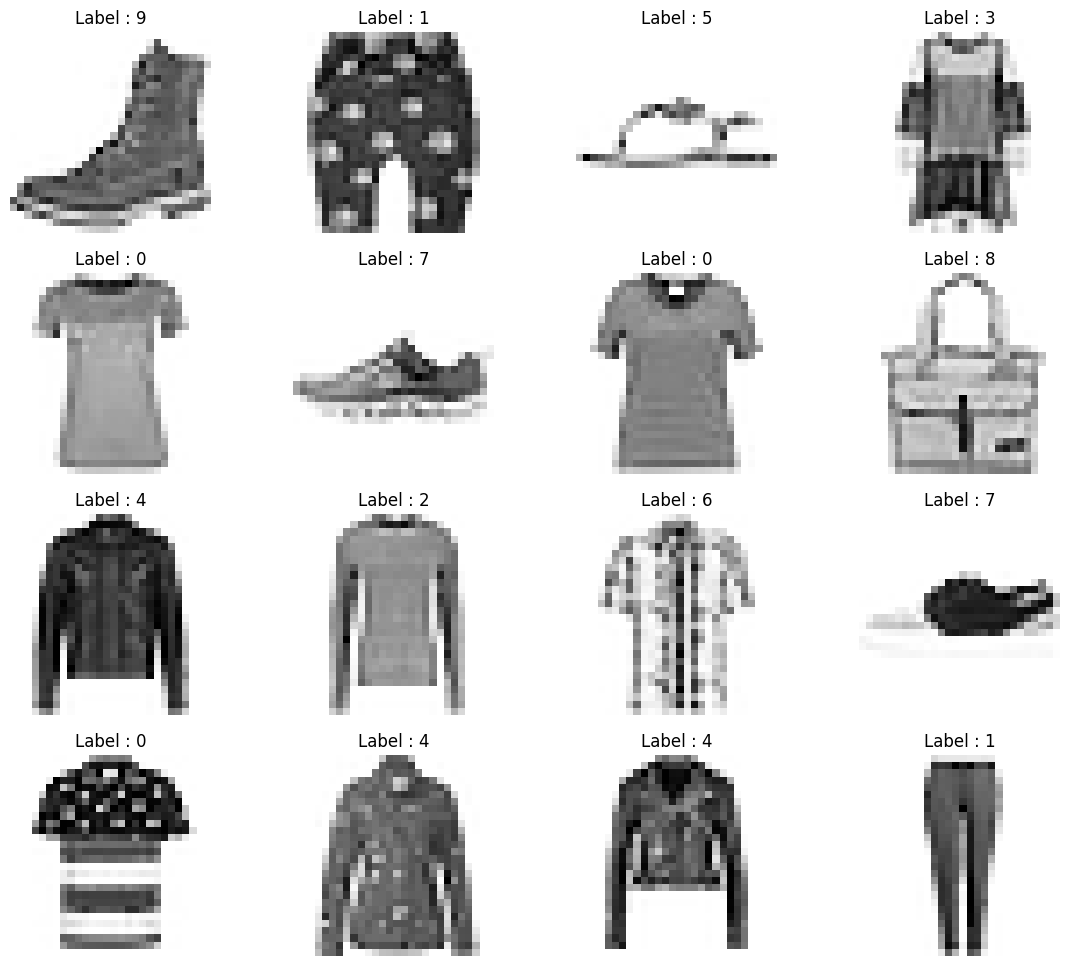

In [17]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_train[n]))
    plt.axis('off')

plt.show()

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/home/kth/anaconda3/envs/dl_venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                 epochs=10, batch_size=100, verbose=1)
print('Fit time : ', time.time() - start_time)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7753 - loss: 0.6455 - val_accuracy: 0.8633 - val_loss: 0.3932
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8765 - loss: 0.3453 - val_accuracy: 0.8661 - val_loss: 0.3706
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 0.8910 - loss: 0.3058 - val_accuracy: 0.8771 - val_loss: 0.3448
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 0.8986 - loss: 0.2778 - val_accuracy: 0.8772 - val_loss: 0.3473
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9034 - loss: 0.2652 - val_accuracy: 0.8772 - val_loss: 0.3384
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.9093 - loss: 0.2459 - val_accuracy: 0.8791 - val_loss: 0.3371
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.9095 - loss: 0.2424 - val_accuracy: 0.8838 - val_loss: 0.3219
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 0.9160 - loss: 0.2285 - val_ac

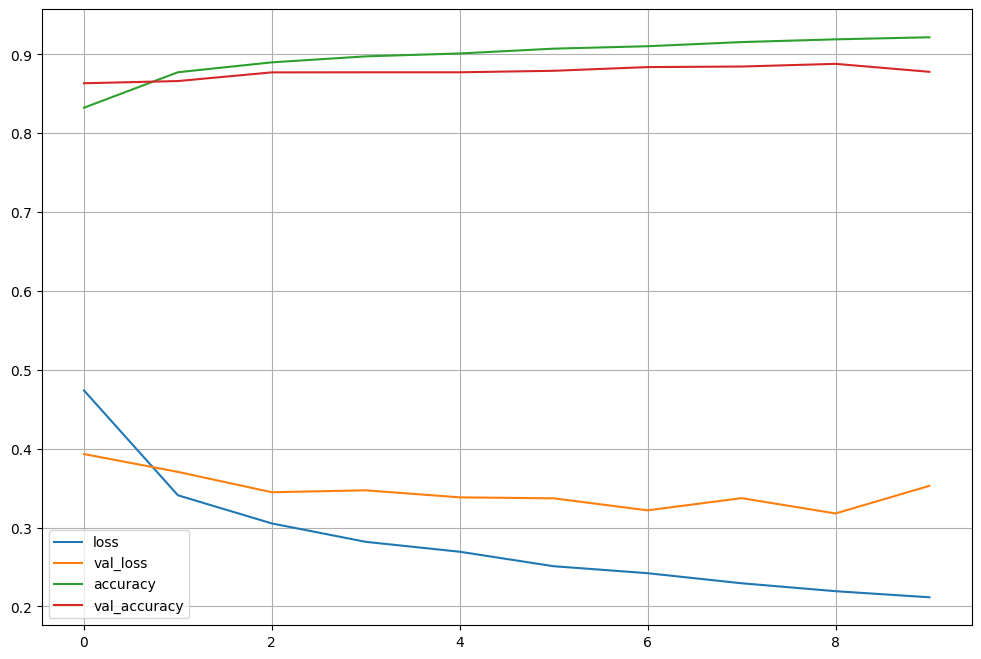

In [23]:

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [25]:
score = model.evaluate(X_test, y_test)
print(score[0])
print(score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.8764 - loss: 0.3616
0.352936327457428
0.8777999877929688


In [28]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [27]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [29]:
wrong_results = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_results.append(n)

len(wrong_results)

1222

In [30]:
import random

samples = random.choices(population=wrong_results, k=16)
samples

[1091,
 248,
 5993,
 8708,
 4460,
 9724,
 5395,
 7221,
 9032,
 4140,
 3240,
 1336,
 5946,
 6441,
 2320,
 6704]

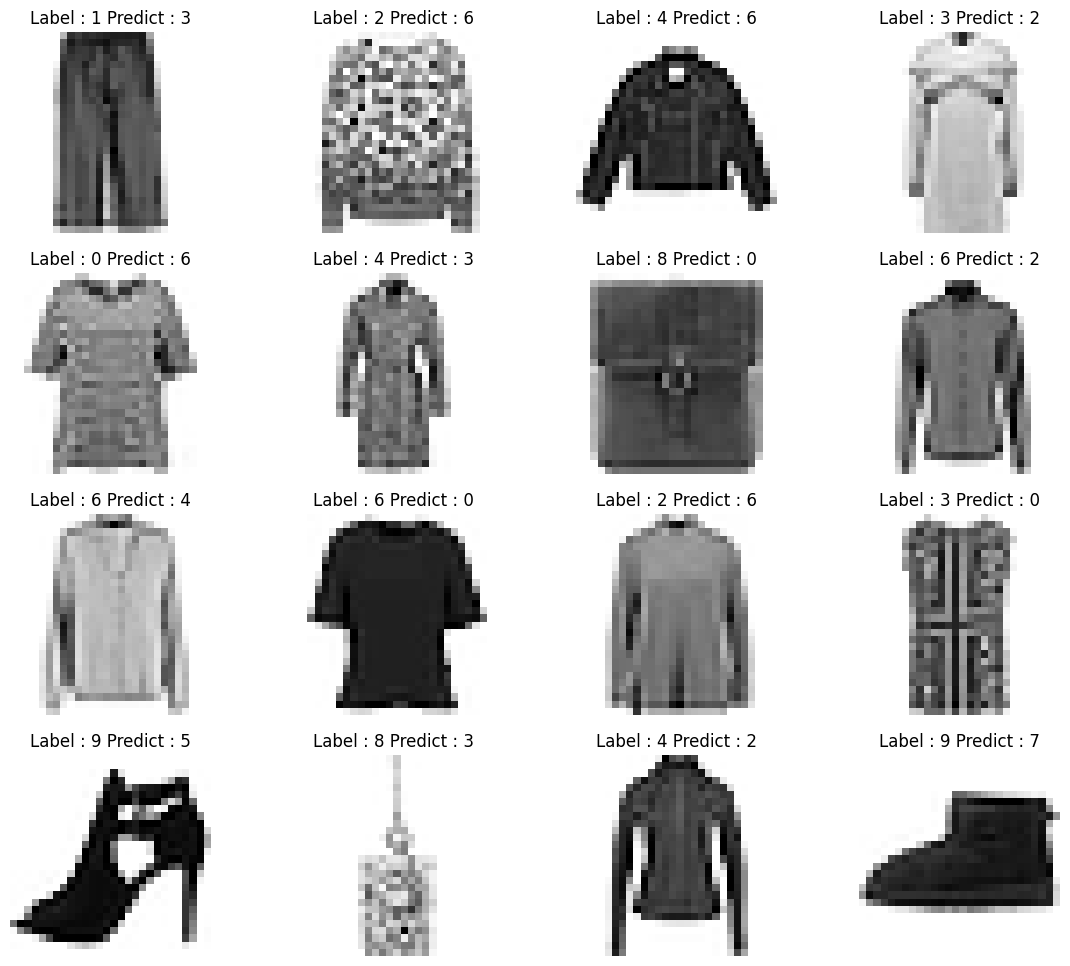

In [32]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()